**2. 多元线性回归 (Multiple Linear Regression)**

假设我们有一个包含 $n$ 个数据点的训练集 $\{(x^{(i)}, y_i)\}_{i=1}^{n}$，其中每个输入特征 $x^{(i)}$ 是一个 $m$ 维向量：$x^{(i)} = \begin{bmatrix} x_1^{(i)} \\ x_2^{(i)} \\ \vdots \\ x_m^{(i)} \end{bmatrix}$，$y_i$ 是对应的输出标签。多元线性回归模型的方程可以表示为：

$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_m x_m$

为了方便使用矩阵表示，我们通常会给每个输入特征向量添加一个额外的维度，其值为 1，对应于截距项 $\theta_0$。因此，我们将输入特征向量表示为 $x^{(i)} = \begin{bmatrix} 1 \\ x_1^{(i)} \\ x_2^{(i)} \\ \vdots \\ x_m^{(i)} \end{bmatrix}$，参数向量表示为 $\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_m \end{bmatrix}$。

这样，模型方程可以简洁地表示为：

$$h_\theta(x) = \theta^T x = x^T \theta$$

**2.1. 代价函数 (Cost Function)**

多元线性回归的代价函数与一元线性回归类似，仍然使用均方误差：

$$J(\theta) = \frac{1}{2n} \sum_{i=1}^{n} (h_\theta(x^{(i)}) - y_i)^2 = \frac{1}{2n} \sum_{i=1}^{n} ( (x^{(i)})^T \theta - y_i )^2$$

使用矩阵表示，我们可以将所有训练数据表示为一个 $n \times (m+1)$ 的矩阵 $X$，其中每一行对应一个训练样本的特征向量（添加了截距项 1）：

$$X = \begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_m^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_m^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(n)} & x_2^{(n)} & \cdots & x_m^{(n)}
\end{bmatrix}$$

将所有输出标签表示为一个 $n \times 1$ 的向量 $y$:

$$y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$$

那么，所有预测值可以表示为 $X\theta$，代价函数可以使用矩阵形式表示为：

$$J(\theta) = \frac{1}{2n} (X\theta - y)^T (X\theta - y)$$

**2.2. 梯度下降 (Gradient Descent)**

多元线性回归的梯度下降更新规则与一元线性回归类似，只是参数 $\theta$ 现在是一个向量：

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) \quad \text{for } j = 0, 1, \ldots, m$$

我们需要计算代价函数对每个参数 $\theta_j$ 的偏导数。

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x^{(i)}) - y_i) x_j^{(i)}$$

其中，$x_0^{(i)} = 1$。

使用向量形式，梯度可以表示为：

$$\nabla_\theta J(\theta) = \frac{1}{n} X^T (X\theta - y)$$

梯度下降更新规则的向量形式为：

$$\theta := \theta - \alpha \frac{1}{n} X^T (X\theta - y)$$

**2.3. 正规方程 (Normal Equation)**

对于多元线性回归，我们也可以使用正规方程直接求解最优参数 $\theta$。我们希望找到使代价函数 $J(\theta) = \frac{1}{2n} (X\theta - y)^T (X\theta - y)$ 最小的 $\theta$。

对 $J(\theta)$ 关于 $\theta$ 求导并令其等于零：

$$\nabla_\theta J(\theta) = \frac{1}{n} X^T (X\theta - y) = 0$$

$$X^T (X\theta - y) = 0$$

$$X^T X \theta - X^T y = 0$$

$$X^T X \theta = X^T y$$

如果矩阵 $X^T X$ 是可逆的（即非奇异的），那么我们可以通过左乘 $(X^T X)^{-1}$ 来解出 $\theta$:

$$\theta = (X^T X)^{-1} X^T y$$

这个公式就是多元线性回归的正规方程。通过这个公式，我们可以直接计算出最优的参数向量 $\theta$，而不需要进行迭代。

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 图形

$$X = \begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_m^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_m^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(n)} & x_2^{(n)} & \cdots & x_m^{(n)}
\end{bmatrix}$$

$$\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_m \end{bmatrix}$$

$$y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$$

$$y = \theta^T x = x^T \theta$$

In [20]:
# -------------------- 生成多元线性回归的示例数据集 --------------------
np.random.seed(0)  # 设置随机种子以确保结果可重复
n_samples = 100
n_features = 2
X = 2 * np.random.rand(n_samples, n_features) # 生成特征矩阵
true_theta = np.array([1, 2, 3])  # [截距, 特征1系数, 特征2系数]
y = true_theta[0] + X[:, 0] * true_theta[1] + X[:, 1] * true_theta[2] + np.random.randn(n_samples) * 0.5 # 添加噪声
# 添加截距项到 X
X_b = np.c_[np.ones((n_samples, 1)), X]

In [21]:
# -------------------- 可视化数据集 --------------------
print('x:\n',X[:5])     # 查看前5行数组数据
print('\n')
print('x_b:\n',X_b[:5])     # 查看前5行数组数据
print('\n')
print('y:\n',y[:5])     # 查看前5行数组数据

x:
 [[1.09762701 1.43037873]
 [1.20552675 1.08976637]
 [0.8473096  1.29178823]
 [0.87517442 1.783546  ]
 [1.92732552 0.76688304]]


x_b:
 [[1.         1.09762701 1.43037873]
 [1.         1.20552675 1.08976637]
 [1.         0.8473096  1.29178823]
 [1.         0.87517442 1.783546  ]
 [1.         1.92732552 0.76688304]]


y:
 [8.04970817 6.14038685 5.99624955 7.88207683 6.90628393]


$$
\nabla J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$
 
其中：
- $X$ 是包含偏置项的设计矩阵（形状为 $m \times (n+1)$，$m$ 是样本数，$n$ 是特征数）
- $\theta$ 是待优化的参数向量（形状为 $(n+1) \times 1$）
- $y$ 是目标变量向量（形状为 $m \times 1$）
- $m$ 是样本数（对应代码中的 `n_samples`）
 
---
 
一、公式分解说明 
1. $X\theta$（预测值计算）  
   对应代码 `X_b.dot(theta_gd)`，即设计矩阵与参数向量相乘，得到预测值向量 $\hat{y}$。
 
2. 误差项 $(X\theta - y)$  
   对应代码 `X_b.dot(theta_gd) - y.reshape(-1, 1)`，计算预测值与真实值的误差。`reshape(-1,1)` 确保 $y$ 为列向量以便矩阵运算。
 
3. 梯度方向 $X^T(X\theta - y)$  
   对应代码 `X_b.T.dot(...)`，通过设计矩阵的转置与误差项相乘，得到每个参数方向上的梯度分量。  
   *几何意义*：将样本误差反向传播到每个特征维度，指示参数调整方向。
 
4. 归一化因子 $\frac{1}{m}$  
   对应代码 `(1/n_samples)`，用于平均所有样本的梯度贡献，避免样本数量影响梯度幅值。
 
---
 
二、推导背景（均方误差损失函数）
梯度公式源于最小化均方误差（MSE）损失函数：
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 
$$
其中 $h_\theta(x) = \theta^T x$。对 $\theta$ 求偏导可得：
$$
\frac{\partial J}{\partial \theta} = \frac{1}{m} X^T (X\theta - y)
$$


In [22]:
# -------------------- 多元线性回归的梯度下降实现 --------------------
learning_rate = 0.01 # 学习率
n_iterations = 1000 # 迭代次数
theta_gd = np.random.randn(n_features + 1, 1)  # 初始化参数

for iteration in range(n_iterations):
    gradients = (1/n_samples) * X_b.T.dot(X_b.dot(theta_gd) - y.reshape(-1, 1))
    theta_gd = theta_gd - learning_rate * gradients

In [23]:
print("\n多元线性回归梯度下降结果:")
print(f"theta_0 (截距): {theta_gd[0][0]:.4f}")
print(f"theta_1 (特征1系数): {theta_gd[1][0]:.4f}")
print(f"theta_2 (特征2系数): {theta_gd[2][0]:.4f}")


多元线性回归梯度下降结果:
theta_0 (截距): 1.5465
theta_1 (特征1系数): 1.6869
theta_2 (特征2系数): 2.7699


对于多元线性回归，我们也可以使用正规方程直接求解最优参数 $\theta$。我们希望找到使代价函数 $J(\theta) = \frac{1}{2n} (X\theta - y)^T (X\theta - y)$ 最小的 $\theta$。

对 $J(\theta)$ 关于 $\theta$ 求导并令其等于零：

$$\nabla_\theta J(\theta) = \frac{1}{n} X^T (X\theta - y) = 0$$

$$X^T (X\theta - y) = 0$$

$$X^T X \theta - X^T y = 0$$

$$X^T X \theta = X^T y$$

如果矩阵 $X^T X$ 是可逆的（即非奇异的），那么我们可以通过左乘 $(X^T X)^{-1}$ 来解出 $\theta$:

$$\theta = (X^T X)^{-1} X^T y$$

这个公式就是多元线性回归的正规方程。通过这个公式，我们可以直接计算出最优的参数向量 $\theta$，而不需要进行迭代。

In [24]:
#-------------------- 多元线性回归的正规方程实现 --------------------
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y.reshape(-1, 1))

In [25]:
print("\n多元线性回归正规方程结果:")
print(f"theta_0 (截距): {theta_best[0][0]:.4f}")
print(f"theta_1 (特征1系数): {theta_best[1][0]:.4f}")
print(f"theta_2 (特征2系数): {theta_best[2][0]:.4f}")


多元线性回归正规方程结果:
theta_0 (截距): 1.0573
theta_1 (特征1系数): 1.8934
theta_2 (特征2系数): 3.0074


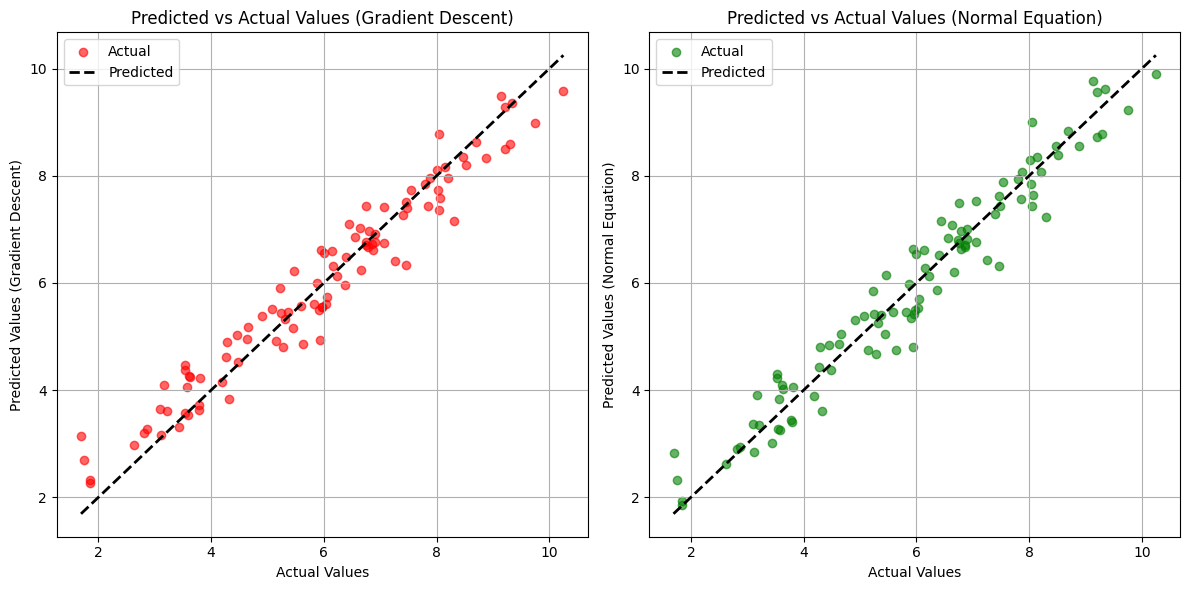

In [26]:
# -------------------- 图像化呈现 (预测值 vs 实际值) --------------------
y_predict_gd = X_b.dot(theta_gd) # 预测值（梯度下降法）
y_predict_ne = X_b.dot(theta_best) # 预测值（正规方程法）

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y, y_predict_gd, color='red', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2,)  # 画一条 y=x 的参考线
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Gradient Descent)')
plt.title('Predicted vs Actual Values (Gradient Descent)')
plt.grid(True)
plt.legend(['Actual','Predicted'], loc='upper left')

plt.subplot(1, 2, 2)
plt.scatter(y, y_predict_ne, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 画一条 y=x 的参考线
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Normal Equation)')
plt.title('Predicted vs Actual Values (Normal Equation)')
plt.grid(True)
plt.legend(['Actual','Predicted'], loc='upper left')
plt.tight_layout()
plt.show()

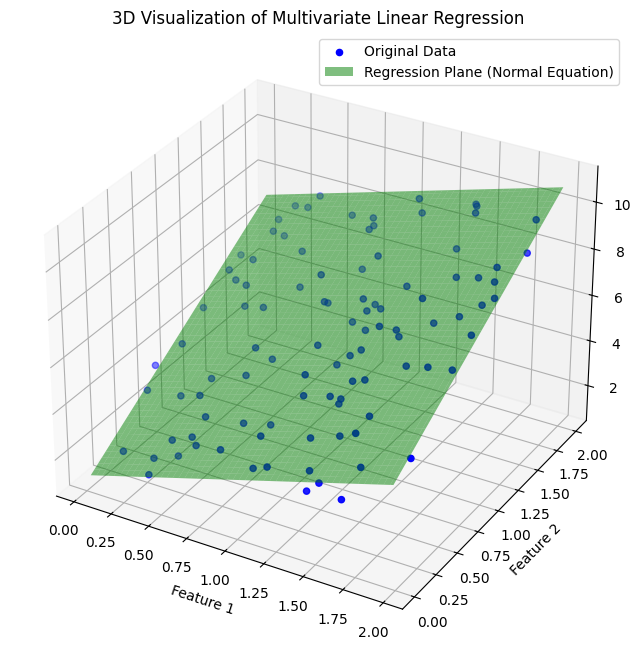

In [27]:
#-------------------- 可选的 3D 可视化 (仅当特征数为 2 时) --------------------
if n_features == 2:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:, 0], X[:, 1], y, c='blue', marker='o', label='Original Data')

    # 创建预测平面 (使用正规方程的结果)
    x1_surf = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2_surf = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    X1, X2 = np.meshgrid(x1_surf, x2_surf)
    Y = theta_best[0][0] + theta_best[1][0] * X1 + theta_best[2][0] * X2
    ax.plot_surface(X1, X2, Y, color='green', alpha=0.5, label='Regression Plane (Normal Equation)')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('y')
    ax.set_title('3D Visualization of Multivariate Linear Regression')
    ax.legend()
    plt.show()